<a href="https://colab.research.google.com/github/3d3n-ops/market-anomaly-prediction/blob/main/Anomaly_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/financial data.csv")

In [ ]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


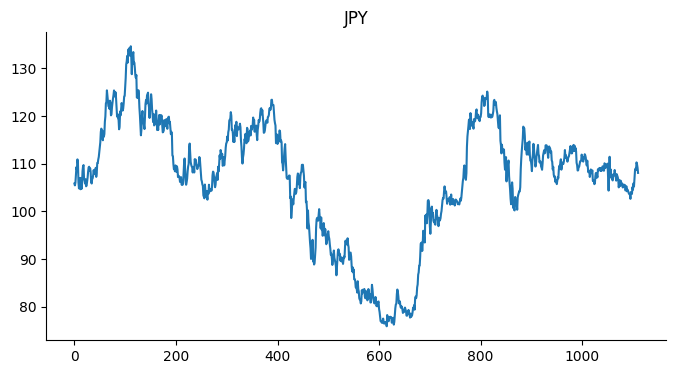

In [ ]:
from matplotlib import pyplot as plt
df['JPY'].plot(kind='line', figsize=(8, 4), title='JPY')
plt.gca().spines[['top', 'right']].set_visible(False)

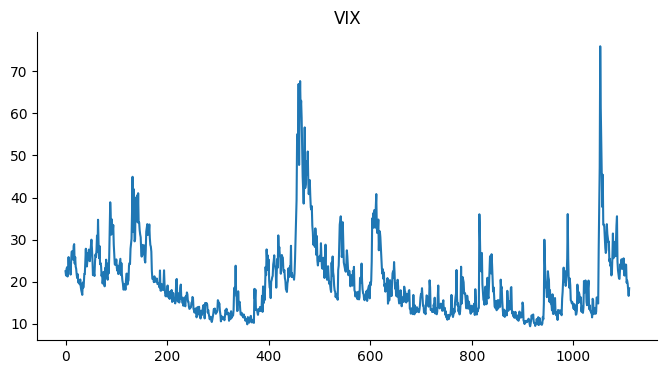

In [ ]:
from matplotlib import pyplot as plt
df['VIX'].plot(kind='line', figsize=(8, 4), title='VIX')
plt.gca().spines[['top', 'right']].set_visible(False)

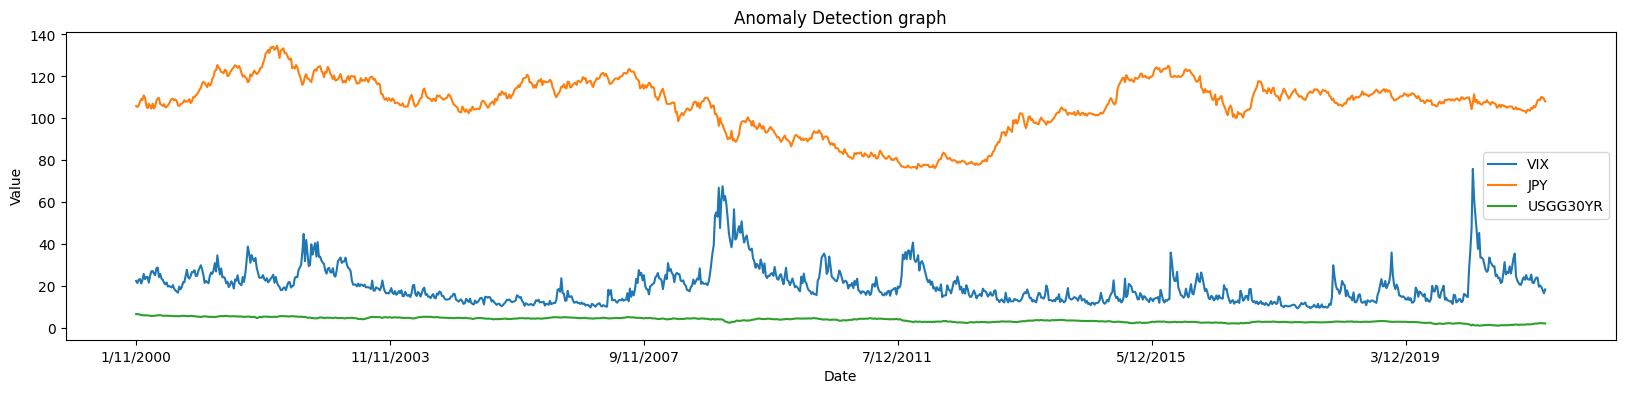

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/financial data.csv")

df.plot(x='Data', y=['VIX', 'JPY', 'USGG30YR'], kind='line', figsize=(20, 4))
plt.title('Anomaly Detection graph')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



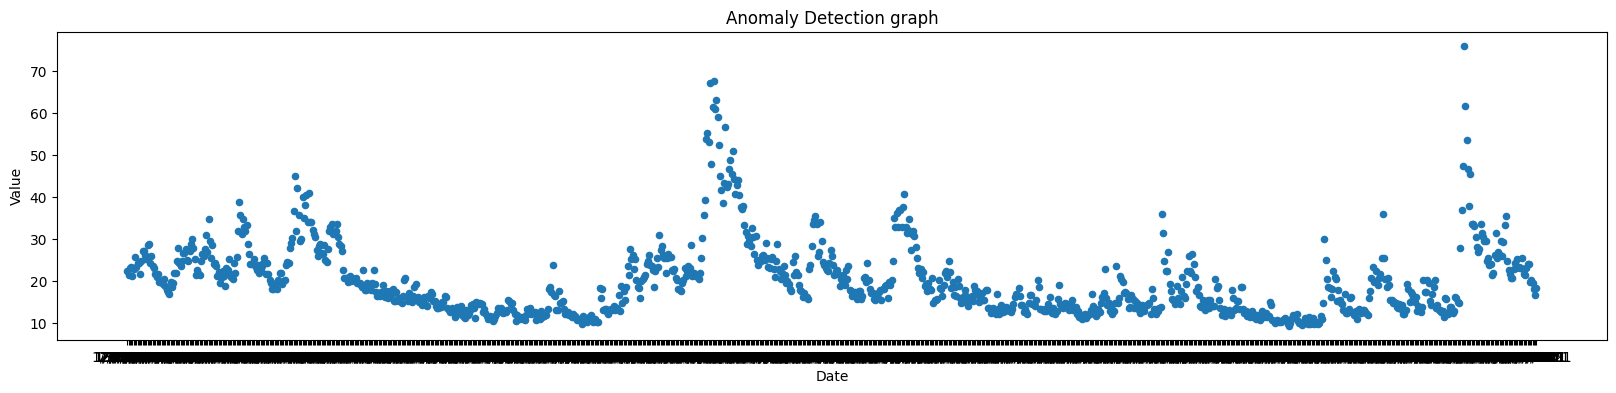

In [ ]:
df.plot.scatter(x='Data', y='VIX', figsize=(20, 4))
plt.title('Anomaly Detection graph')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
features = df.drop(['Y'], axis=1)
features

,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [ ]:
target = df['Y']
target

,Y
0,0
1,0
2,0
3,0
4,1
...,...
1106,0
1107,0
1108,0
1109,0


In [ ]:
pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 19.2 MB/s eta 0:00:00


Training and Testing data split

I chose 1/11/2011 as my split point since first date in the time-series dataset is 1/11/2000.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df['Date'] = pd.to_datetime(df['Data'])

features = df.drop(['Y', 'Data', 'Date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[0]

array([ 0.69444386,  0.45816213, -0.79925167, -0.90932775,  0.46714485,
       -0.36811659, -1.24172015, -0.68081812, -0.96856785, -1.36252949,
       -1.26288058, -0.7397763 , -0.71190774, -0.68567167, -1.43303782,
       -1.33152041, -1.07763069, -0.97677662, -1.81858982, -1.71650701,
       -1.26224478, -1.73526361, -1.49865528, -1.12436661, -1.58448481,
       -1.58127945, -1.01932414,  0.99665597,  1.07440828,  1.00917389,
        0.90507121,  0.94287845,  1.04356188,  1.01968494,  0.87367152,
        0.63417262,  0.39687565,  0.04932911, -0.2053894 , -0.50634989,
        0.87810412,  0.19468193])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
lr_model = LogisticRegression(random_state=42, class_weight={0: 1, 1: 10})
lr_model.fit(X_train, y_train)



LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.7892376681614349


In [ ]:
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       177
           1       0.49      0.89      0.64        46

    accuracy                           0.79       223
   macro avg       0.73      0.83      0.74       223
weighted avg       0.87      0.79      0.81       223



In [ ]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"(model.__class__,__name__) Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("--------------")

  with open(filename, "wb") as file:
    pickle.dump(model, file)
  print(f"Model saved as {filename}")

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 10})
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

(model.__class__,__name__) Accuracy: 0.8924

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       177
           1       0.78      0.67      0.72        46

    accuracy                           0.89       223
   macro avg       0.85      0.81      0.83       223
weighted avg       0.89      0.89      0.89       223

--------------
Model saved as xgb_model.pkl
(model.__class__,__name__) Accuracy: 0.9103

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       177
           1       0.86      0.67      0.76        46

    accuracy                           0.91       223
   macro avg       0.89      0.82      0.85       223
weighted avg       0.91      0.91      0.91       223

--------------
Model saved as rf_model.pkl


In [ ]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [ ]:
feature_names

Index(['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1',
       'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y',
       'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR',
       'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y',
       'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU',
       'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN',
       'MXCN'],
      dtype='object')

In [ ]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

feature_importances_df

,feature,importance
0,XAU BGNL,0.017220
1,ECSURPUS,0.014542
2,BDIY,0.018242
3,CRY,0.008930
4,DXY,0.023763
5,JPY,0.022715
6,GBP,0.021487
7,Cl1,0.010790
8,VIX,0.148723
9,USGG30YR,0.008544


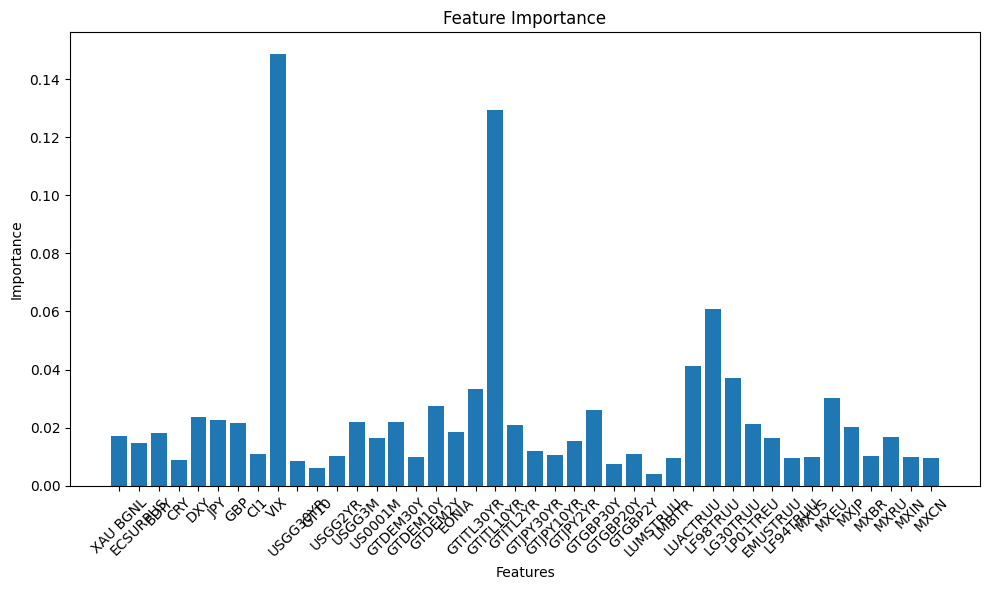

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['feature'],feature_importances_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install streamlit-lightweight-charts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.3/669.3 kB 41.4 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
	os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
pip install yfinance



Streamlit Code

In [ ]:
%%writefile app.py



import streamlit as st
from streamlit_lightweight_charts import renderLightweightCharts
import streamlit_lightweight_charts.dataSamples as data
import pandas as pd

df = pd.read_csv("/content/financial data.csv")

chartOptions = {
    "layout": {
        "textColor": 'black',
        "background": {
            "type": 'solid',
            "color": 'white'
        }
    }
}

st.subheader("Anomaly Detection Model")

data_select = st.sidebar.radio('Select market indicator:', ('VIX', 'JPY', 'GTITL 30YR', 'LUAC TRUU', 'LMBITR', 'LF98TRUU'))

if data_select == 'JPY':
    renderLightweightCharts( [
        {
            "chart": chartOptions,
            "series": [{
                "type": 'Area',
                "data": df['JPY'].tolist(),
                "options": {}
            }],
        }
    ], 'area')
elif data_select == 'VIX':
    renderLightweightCharts( [
        {
            "chart": chartOptions,
            "series": [{
                "type": 'Area',
                "data": df['JPY'].tolist(),
                "options": {}
            }],
        }
    ], 'area')
elif data_select == 'GTITL 30YR':
    renderLightweightCharts( [
        {
            "chart": chartOptions,
            "series": [{
                "type": 'Area',
                "data": df['GTITL 30YR'].tolist(),
                "options": {}
            }],
        }
    ], 'area')
elif data_select == 'LUAC TRUU':
    renderLightweightCharts( [
        {
            "chart": chartOptions,
            "series": [{
                "type": 'Area',
                "data": df['LUAC TRUU'].tolist(),
                "options": {}
            }],
        }
    ], 'area')
elif data_select == 'LMBITR':
    renderLightweightCharts( [
        {
            "chart": chartOptions,
            "series": [{
                "type": 'Area',
                "data": df['LMBITR'].tolist(),
                "options": {}
            }],
        }
    ], 'area')
else:
    renderLightweightCharts( [
        {
            "chart": chartOptions,
            "series": [{
                "type": 'Area',
                "data": df['LF98TRUU'].tolist(),
                "options": {}
            }],
        }
    ], 'area')


    import yfinance as yf
import time
from datetime import datetime
import os

class StockTracker:
    def __init__(self, symbols):
        """
        Initialize StockTracker with a list of stock symbols

        Args:
            symbols (list): List of stock symbols to track (e.g., ['AAPL', 'MSFT'])
        """
        self.symbols = symbols

    def get_stock_data(self):
        """Fetch current stock data for all symbols"""
        data = {}
        for symbol in self.symbols:
            try:
                stock = yf.Ticker(symbol)
                # Get the current price and previous close
                current = stock.info.get('regularMarketPrice', 0)
                prev_close = stock.info.get('previousClose', 0)

                # Calculate percentage change
                if prev_close:
                    change = ((current - prev_close) / prev_close) * 100
                else:
                    change = 0

                data[symbol] = {
                    'price': current,
                    'change': change
                }
            except Exception as e:
                print(f"Error fetching data for {symbol}: {str(e)}")
                data[symbol] = {'price': 0, 'change': 0}

        return data

    def display_banner(self, data):
        """Display stock prices in a banner format"""
        # Clear screen (works on both Windows and Unix-like systems)
        os.system('cls' if os.name == 'nt' else 'clear')

        print("═" * 80)
        print(f"LIVE STOCK PRICES - Updated at {datetime.now().strftime('%H:%M:%S')}")
        print("═" * 80)

        for symbol, info in data.items():
            price = info['price']
            change = info['change']

            # Create arrow indicator
            arrow = "▲" if change > 0 else "▼" if change < 0 else "■"

            # Format the display string
            print(f"{symbol:<6} ${price:,.2f} {arrow} {change:+.2f}%")

        print("═" * 80)

    def run(self, update_interval=10):
        """
        Run the stock tracker with continuous updates

        Args:
            update_interval (int): Seconds between updates
        """
        print(f"Starting stock tracker... (Press Ctrl+C to exit)")

        try:
            while True:
                data = self.get_stock_data()
                self.display_banner(data)
                time.sleep(update_interval)

        except KeyboardInterrupt:
            print("\nStock tracker stopped.")

# Example usage
if __name__ == "__main__":
    # List of stock symbols to track
    symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']

    # Create and run the tracker
    tracker = StockTracker(symbols)
    tracker.run(update_interval=10)  # Updates every 10 seconds

Writing app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://dfc1-34-143-149-55.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
	print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
	ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://dfc1-34-143-149-55.ngrok-free.app -> http://localhost:8501
